Event counts:
event_type
submit                  7
suggestion_triggered    6
reveal_clicked          4
accept_clicked          4
ignored                 2
Name: count, dtype: int64


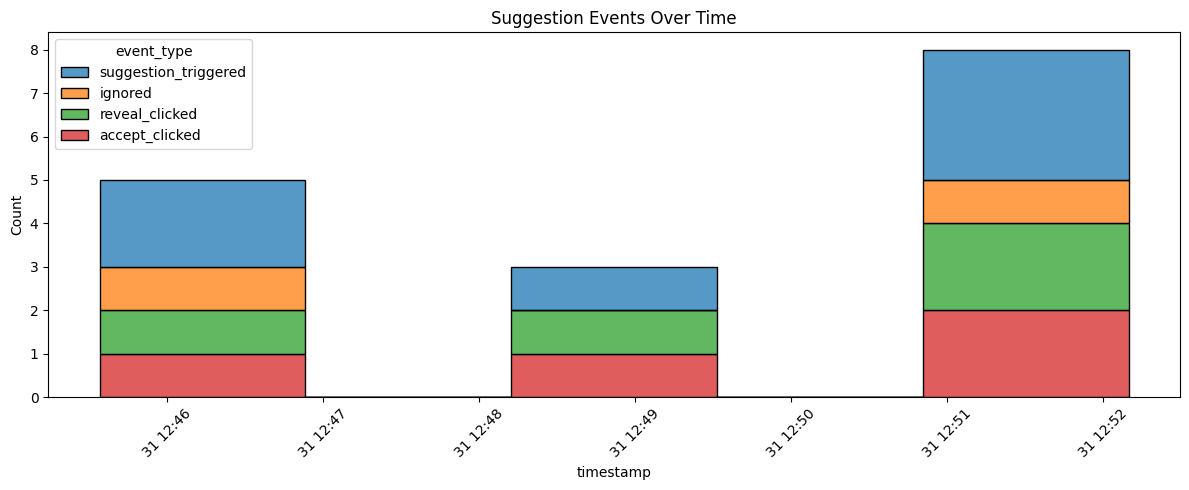

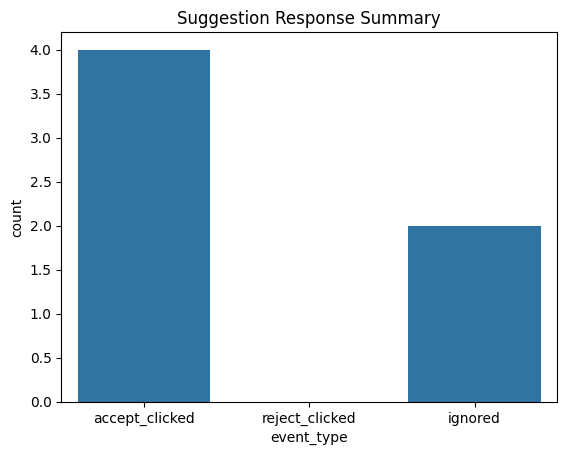

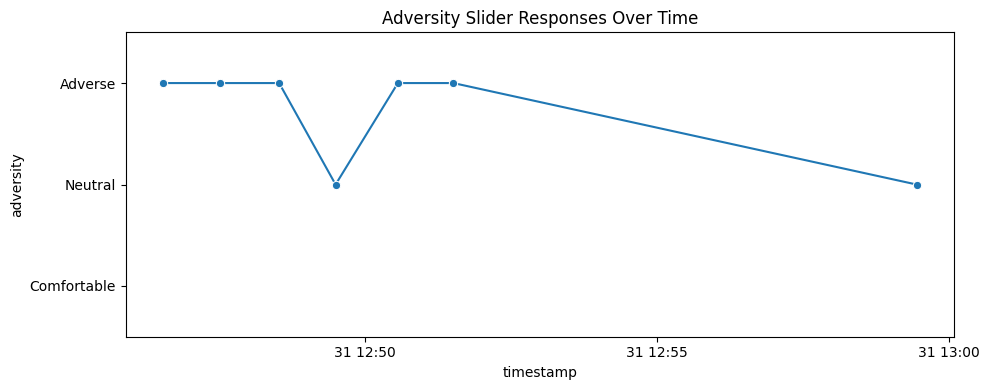

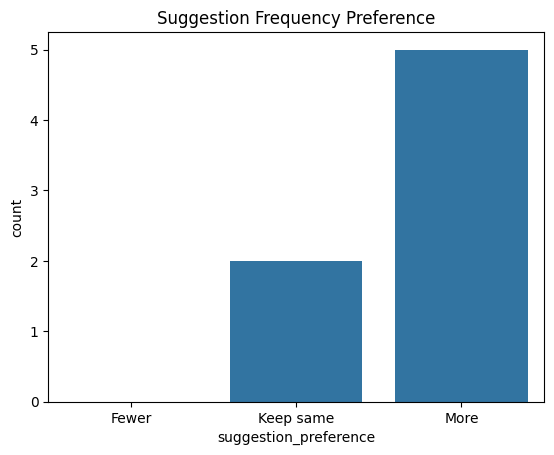

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df = pd.read_csv("romain.csv")

# Convert timestamps
df['timestamp'] = pd.to_datetime(df['unix_timestamp'], unit='s')

# Basic stats
print("Event counts:")
print(df['event_type'].value_counts())

# Plot timeline of suggestion events
plt.figure(figsize=(12, 5))
sns.histplot(data=df[df['event_type'].isin(['suggestion_triggered', 'reveal_clicked', 'accept_clicked', 'reject_clicked', 'ignored'])],
             x='timestamp', hue='event_type', multiple='stack')
plt.xticks(rotation=45)
plt.title("Suggestion Events Over Time")
plt.tight_layout()
plt.show()

# Count accept/reject/ignore rates
suggestion_events = df[df['event_type'].isin(['accept_clicked', 'reject_clicked', 'ignored'])]
sns.countplot(data=suggestion_events, x='event_type', order=['accept_clicked', 'reject_clicked', 'ignored'])
plt.title("Suggestion Response Summary")
plt.show()

# Adversity level over time
if 'adversity' in df.columns:
    plt.figure(figsize=(10, 4))
    df_adversity = df[df['event_type'] == 'submit']
    sns.lineplot(x='timestamp', y='adversity', data=df_adversity, marker='o')
    plt.title("Adversity Slider Responses Over Time")
    plt.ylim(-0.5, 2.5)
    plt.yticks([0, 1, 2], ['Comfortable', 'Neutral', 'Adverse'])
    plt.tight_layout()
    plt.show()

# Suggestion frequency preference
if 'suggestion_preference' in df.columns:
    sns.countplot(data=df[df['event_type'] == 'submit'], x='suggestion_preference',
                  order=['Fewer', 'Keep same', 'More'])
    plt.title("Suggestion Frequency Preference")
    plt.show()


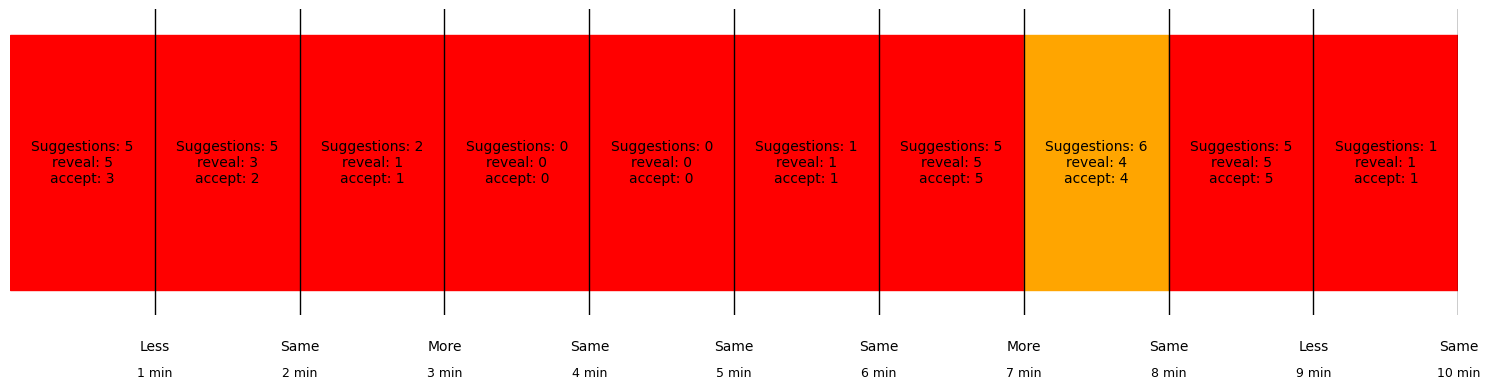

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from datetime import datetime

df = pd.read_csv("lika.csv")

df['event_type'] = df['event_type'].fillna('')
df['suggestion_text'] = df['suggestion_text'].fillna('')
df['adversity'] = df['adversity'].fillna(-1)
df['suggestion_preference'] = df['suggestion_preference'].fillna('')

timeline = []
current_block = {
    'timestamp': None,
    'adversity': None,
    'suggestion_preference': None,
    'suggestions': 0,
    'reveals': 0,
    'accepts': 0,
}
for i, row in df.iterrows():
    if row['event_type'] == 'submit':
        if current_block['timestamp'] is not None:
            timeline.append(current_block)
        current_block = {
            'timestamp': row['unix_timestamp'],
            'adversity': int(row['adversity']),
            'suggestion_preference': row['suggestion_preference'],
            'suggestions': 0,
            'reveals': 0,
            'accepts': 0,
        }
    elif row['event_type'] == 'suggestion_triggered':
        current_block['suggestions'] += 1
    elif row['event_type'] == 'reveal_clicked':
        current_block['reveals'] += 1
    elif row['event_type'] == 'accept_clicked':
        current_block['accepts'] += 1
if current_block['timestamp'] is not None:
    timeline.append(current_block)

# Plot
fig, ax = plt.subplots(figsize=(15, 4))
colors = {0: 'green', 1: 'orange', 2: 'red'}
labels = {0: 'Comfortable', 1: 'Neutral', 2: 'Adverse'}

for i, block in enumerate(timeline):
    color = colors.get(block['adversity'], 'gray')
    preference = block['suggestion_preference']
    txt = (
        f"Suggestions: {block['suggestions']}\n"
        f"reveal: {block['reveals']}\n"
        f"accept: {block['accepts']}"
    )
    
    # Color block
    ax.add_patch(patches.Rectangle((i, 0), 1, 1, color=color))
    
    ax.text(i + 0.5, 0.5, txt, ha='center', va='center', fontsize=10)
    
    # Vertical line between each minute
    ax.axvline(x=i + 1, color='black', linewidth=1)
    
    # Label below line (moved closer to x-axis)
    ax.text(i + 1, -0.25, preference, ha='center', va='bottom', fontsize=10)
    # Minute labels moved closer to x-axis
    ax.text(i + 1, -0.35, f"{i+1} min", ha='center', va='bottom', fontsize=9)

ax.set_xlim(0, len(timeline))
ax.set_ylim(-0.1, 1.1)  # y-limits to accommodate closer labels
ax.axis('off')
plt.tight_layout()
plt.show()